In [1]:
# Bibliotecas
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Abrindo a base de dados


In [2]:
filename = pathlib.Path.cwd() / 'Base_MindMiners.xlsx'
db = pd.read_excel('Base_MindMiners.xlsx')

In [3]:
db.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Variável,Tipo,Pergunta,Respostas/Categorias
1,NaN,P1,Resposta Única,Quantas vezes você costuma viajar por ano?,(1) 1 a 3 vezes; (2) 4 a 6 vezes; (3) 7 a 10 v...
2,NaN,P2,Resposta Múltipla,Qual foi o princípal motivo de suas ultimas vi...,(1) Visitar amigos; (2) Visitar familia; (3)La...
3,NaN,P3,Escala,O quão importante para você é a infraestrutura...,1 (Não Utilizo) ; 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Utili...
4,NaN,P4,Escala,Restaurante,1 (Não utilizo) ; 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Utili...


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  72 non-null     object 
 2   Unnamed: 2  72 non-null     object 
 3   Unnamed: 3  72 non-null     object 
 4   Unnamed: 4  72 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [5]:
df = pd.read_excel('Base_MindMiners.xlsx', sheet_name='Pesquisa-Respostas')

In [6]:
df.head()

,Unnamed: 0,P1,P2,P3,P4,Unnamed: 5,P5,P6,.P7,P8,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,NaN,2.0,7,7.0,5.0,NaN,4,2,6,7.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,NaN,3.0,2,2.0,6.0,4.0,4,2,5,1.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,NaN,1.0,7,7.0,5.0,NaN,4,5,6,6.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,NaN,1.0,3,4.0,4.0,NaN,6,6,1,7.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,NaN,2.0,7,6.0,7.0,NaN,3,3,7,6.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel


# Limpando a base de dados

In [7]:
# Remover as colunas com índices 'Unnamed'
df = df.drop(columns=[coluna for coluna in df.columns if coluna.startswith('Unnamed:')])

In [8]:
df.head()

,P1,P2,P3,P4,P5,P6,.P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel


In [9]:
# Usando a função split para remover espaços nos indexes das colunas
df.columns = df.columns.str.strip()

In [10]:
# # Usando a função str.replace para remover "." dos indexes das colunas
df.columns = df.columns.str.replace(".", "")

C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19332\2669726975.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


Removendo conteudo indesejado das colunas

In [11]:
# Lista com todas as colunas
nomes = list(df)

In [12]:
# Primeria coluna
df.loc[~df.loc[:, nomes[0]].isin(range(1,5)), nomes[0]] = 'nan'

In [13]:
# Seguna coluna
df.loc[~df.loc[:, nomes[1]].isin(range(1,9)), nomes[1]] = 'nan'

In [14]:
# Coluna 3 a 58
for coluna in range(2, 58):
    df.loc[~df.loc[:, nomes[coluna]].isin(range(1,8)), nomes[coluna]] = 'nan'

In [15]:
# Coluna Qesc
df.loc[~df.loc[:, nomes[58]].isin(range(1,7)), nomes[58]] = 'nan'

In [16]:
# Coluna Qnat
df.loc[~df.loc[:, nomes[60]].isin(range(0,6)), nomes[60]] = 'nan'

In [17]:
# Coluna Qcama
df.loc[~df.loc[:, nomes[62]].isin(range(1,5)), nomes[62]] = 'nan'

In [18]:
# Coluna Qche
lista_quinta_feira = ["Quinta-Feira", "Quinta Feira", "quinta-Feira", "quintaFeira"]
df.loc[df.loc[:, nomes[64]].isin(lista_quinta_feira), nomes[64]] = 'Quinta-Feira'

In [19]:
# tab = df['Qnat'].value_counts(sort=False)
# tab.to_frame()

In [ ]:
# Checando qual indice pertence a qual coluna
# nomes[60]

In [20]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,B,Dados para Marketing
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,B,NaN
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,B,Dados para Hotel
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,B,Marketing
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,A,Dados para Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3,7.0,6.0,6,6,2,4.0,7,5.0,...,Solteiro,2.0,6.0,Domingo,5.0,5.0,2.0,1.0,A,Pesquisa Hotel
1264,1.0,3,7.0,7.0,5,3,6,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,5.0,4.0,2.0,2.0,A,Pesquisa
1265,2.0,7,6.0,6.0,4,5,6,6.0,5,1.0,...,Casado,2.0,3.0,Quinta-Feira,4.0,5.0,2.0,1.0,A,Dados para Hotel
1266,2.0,3,5.0,5.0,6,5,7,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,4.0,4.0,2.0,3.0,A,Coleta de dados


# Primeira análise dos dados

Preparando o banco de dados para a análise exploratória

In [37]:
df_ae = df

# Frequência de viagem
df_ae['P1'] = df_ae['P1'].astype('category')
df_ae['P1'].cat.categories = ['1 a 3', '4 a 6', '7 a 10', '10+', 'nan']

# Faixa etaria
df_ae['Qid'] = df_ae['Qid'].astype('category')
df_ae['Qid'].cat.categories = ['18-', '18 a 24', '25 a 34', '35 a 44', '45 a 54', '55+']

# Estadia media
df_ae['Qesc'] = df_ae['Qesc'].astype(float)

# Regiao
df_ae['Qreg'] = df_ae['Qreg'].astype('category')
df_ae['Qreg'].cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

# Gênero
df_ae['Qgen'] = df_ae['Qgen'].astype('category')
df_ae['Qgen'].cat.categories = ['Masculino', 'Feminino']

# Número de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Motivo viagem
df_ae['P2'] = df_ae['P2'].astype('category')
df_ae['P2'].cat.categories = ['Visitar amigos', 'Visitar familia', 'Lazer', 'Pesquisa Ciêntifica', 'Trabalho', 'Viagem gastronomica', 'Desconectar', 'Não realizei viagens'] 

df_ae

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qreg,Qclasse,Qs,Casado,Divorciado,Separado,Solteiro,Viúvo,1.0,2.0
0,4 a 6,Desconectar,7.0,5.0,4,2,6,7.0,5,1.0,...,Sul,B,Dados para Marketing,1,0,0,0,0,1,0
1,7 a 10,Visitar familia,2.0,6.0,4,2,5,1.0,3,2.0,...,Norte,B,NaN,0,0,0,0,1,1,0
2,1 a 3,Desconectar,7.0,5.0,4,5,6,6.0,5,2.0,...,Sul,B,Dados para Hotel,1,0,0,0,0,1,0
3,1 a 3,Lazer,4.0,4.0,6,6,1,7.0,6,6.0,...,Sul,B,Marketing,0,1,0,0,0,0,1
4,4 a 6,Desconectar,6.0,7.0,3,3,7,6.0,5,2.0,...,Sul,A,Dados para Hotel,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,4 a 6,Lazer,7.0,6.0,6,6,2,4.0,7,5.0,...,Sudeste,A,Pesquisa Hotel,0,0,0,0,1,0,1
1264,1 a 3,Lazer,7.0,7.0,5,3,6,6.0,5,2.0,...,Sul,A,Pesquisa,1,0,0,0,0,0,1
1265,4 a 6,Desconectar,6.0,6.0,4,5,6,6.0,5,1.0,...,Sudeste,A,Dados para Hotel,1,0,0,0,0,0,1
1266,4 a 6,Lazer,5.0,5.0,6,5,7,6.0,5,2.0,...,Centro Oeste,A,Coleta de dados,1,0,0,0,0,0,1


Primeiramente, separamos as colunas que acreditamos serem as mais importantes para definir o público-alvo

In [38]:
freq_de_viagem = df_ae['P1'] # qualitativa
faixa_etaria = df_ae['Qid'] # qualitativa 
nivel_escolaridade = df_ae['Qesc'] # qualitativa
motivo_viagem = df_ae['P2'] # qualitativa
ocupacao = df_ae['Qocup'] # qualitativa
genero = df_ae['Qgen'] # qualitativa
estado_civil = df_ae['Qciv'] # qualitativa
filhos = df_ae['Qnat'] # quantitativa
estadia_media = df_ae['Qest'] # quantitativa
regiao = df_ae['Qreg'] # qualitativa

#quantitativa e qualitativa --> histograma e boxplot
#qualitativa e qualitativa --> tabela cruzada e grafico de barra
#quantitativa e quantitativa --> gráfico de dispersão

Abaixo está a análise exploratória. Nossa ideia inicial é ver qual é o "tipo de pessoa" que viaja com mais frequência. Além disso, fizemos algumas outras análises para obter informações importantes a respeito do banco de dados.

In [39]:
# Cores
cores = ['lightcoral', 'yellow', 'darkgoldenrod', 'limegreen', 'dodgerblue', 'purple', 'red']
cores2 = [ 'pink', 'blue']
cores3 = ['blue', 'red']

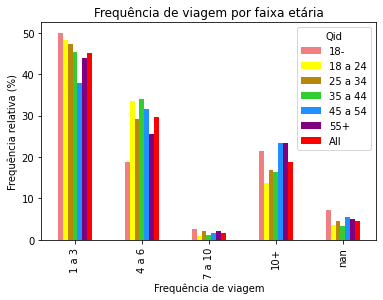

In [40]:
# Gráfico de barras de frequência de viagem por faixa etária
freq_x_idade = pd.crosstab(freq_de_viagem, faixa_etaria, normalize = 'columns', margins = True).round(3)*100

freq_x_idade.plot.bar(color = cores)
plt.title('Frequência de viagem por faixa etária')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

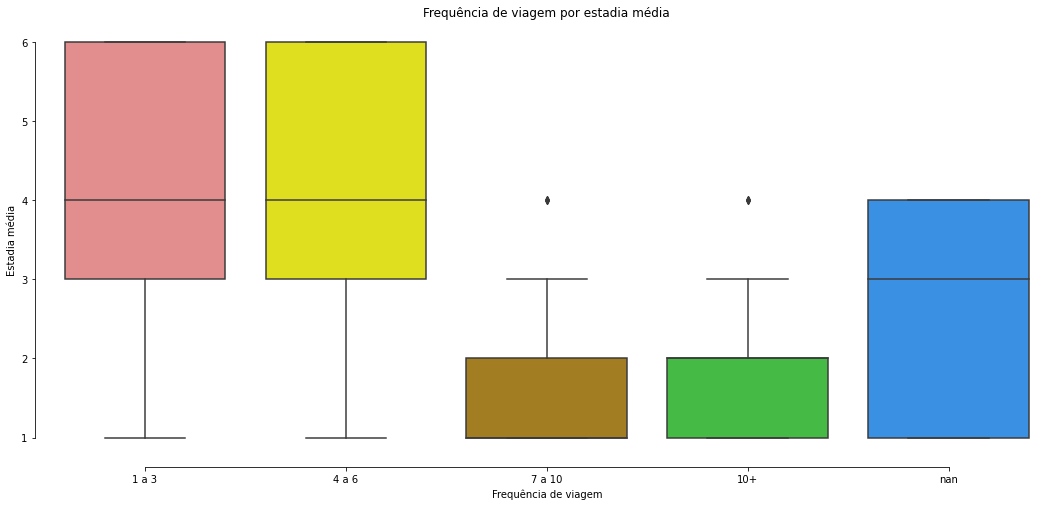

In [41]:
# Boxplot da frequência de viagem pela estadia média
plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=estadia_media,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por estadia média')
plt.xlabel('Frequência de viagem')
plt.ylabel('Estadia média')
sns.despine(offset=10, trim=True)

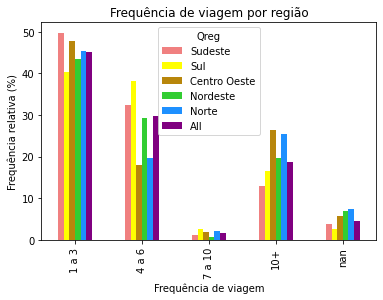

In [42]:
# Gráfico de barras de frequência de viagem por região
freq_x_regiao = pd.crosstab(freq_de_viagem, regiao, normalize = 'columns', margins = True).round(3)*100
#normalize = index --> Ex: Freq.A: sudeste + sul + nordeste + centro oeste = 100%
#normalize = columns --> Ex: Sudeste - freq.A + sudeste - freq.B + sudeste - freq.C - 100%

freq_x_regiao.plot.bar(color = cores)
plt.title('Frequência de viagem por região')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

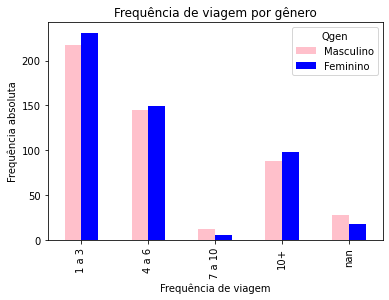

In [43]:
# Gráfico de barras de frequência de viagem por gênero
freq_x_gen = pd.crosstab(freq_de_viagem, genero)

freq_x_gen.plot.bar(color = cores2)
plt.title('Frequência de viagem por gênero')
plt.ylabel('Frequência absoluta') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

Para as seguintes análises decidimos criar um dataframe novo apenas com as famílias, ou seja, com as pessoas casadas que tem pelo menos um filho, e outro dataframe com as pessoas que não são casadas

In [44]:
df_familia = df_ae

# Filtrando apenas as familias
casados = df_ae['Qciv'] == 'Casado'
filhos = df_ae['Qnat'].isin(range(1,6))

# Criando um banco de dados apenas com as familias
df_familia = df_familia.loc[casados & filhos, :]


In [45]:
df_nao_familia = df_ae

# # Filtrando apenas as "não familias"
nao_casados = df_ae['Qciv'] != 'Casado'

# Criando um banco de dados apenas com as "não familias"
df_nao_familia = df_ae.loc[nao_casados, :]


In [46]:
estadia_familia = (df_familia.Qest.value_counts(sort=False, normalize=True).round(4)*100).to_frame()
estadia_familia

,Qest
4.0,39.87
6.0,5.70
1.0,8.86
3.0,40.51
2.0,5.06


In [47]:
estadia_nao_familia = (df_nao_familia.Qest.value_counts(sort=False, normalize=True).round(4)*100).to_frame()
estadia_nao_familia

,Qest
1.0,16.80
6.0,41.41
2.0,17.97
4.0,12.30
3.0,11.52


In [48]:
# Tempo de estadia, em porcentagem, de uma familia e de uma "não familia"

df_familia['Estadia_familia'] = df_familia['Qest'] #essa mudanca de nome esta causando o erro
estadia_familia = (df_familia['Estadia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']
estadia_nao_familia = (df_nao_familia['Estadia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

Qest_familia_x_naofamilia = pd.concat([estadia_familia, estadia_nao_familia], axis=1)
print(Qest_familia_x_naofamilia)

     Estadia_familia  Estadia_nao_familia
4.0            39.87                12.30
6.0             5.70                41.41
1.0             8.86                16.80
3.0            40.51                11.52
2.0             5.06                17.97


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19332\1043923398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_familia['Estadia_familia'] = df_familia['Qest'] #essa mudanca de nome esta causando o erro
C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19332\1043923398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']


In [49]:
# Frequência de viagem, em porcentagem, de uma familia e de uma "não familia"

df_familia['Frequencia_familia'] = df_familia['P1']
frequencia_familia = (df_familia['Frequencia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']
frequencia_nao_familia = (df_nao_familia['Frequencia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

P1_familia_x_naofamilia = pd.concat([frequencia_familia, frequencia_nao_familia], axis=1)
print(P1_familia_x_naofamilia)

C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19332\3080528535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_familia['Frequencia_familia'] = df_familia['P1']


        Frequencia_familia  Frequencia_nao_familia
1 a 3                55.06                   25.73
4 a 6                28.48                   15.08
7 a 10                1.58                    1.27
10+                  11.39                   18.76
nan                   3.48                   39.16


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19332\3080528535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']


Por último fizemos uma análise do motivo da viagem 

In [50]:
# Motivo da viagem em porcentagem

df_ae['Motivo_viagem'] = df_ae['P2']
(df_ae['Motivo_viagem'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()


,Motivo_viagem
Visitar amigos,2.05
Visitar familia,14.35
Lazer,32.81
Pesquisa Ciêntifica,1.10
Trabalho,9.70
Viagem gastronomica,0.95
Desconectar,17.27
Não realizei viagens,21.77


# Clusterização

In [51]:
# Vamos criar as dummies para usar o método de clusterização K-means
estado_dummies = pd.get_dummies(df['Qciv'])
df = pd.concat([df, estado_dummies], axis=1)
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Solteiro,Viúvo,1.0,2.0,Motivo_viagem,Casado,Divorciado,Separado,Solteiro,Viúvo
0,4 a 6,Desconectar,7.0,5.0,4,2,6,7.0,5,1.0,...,0,0,1,0,Desconectar,1,0,0,0,0
1,7 a 10,Visitar familia,2.0,6.0,4,2,5,1.0,3,2.0,...,0,1,1,0,Visitar familia,0,0,0,0,1
2,1 a 3,Desconectar,7.0,5.0,4,5,6,6.0,5,2.0,...,0,0,1,0,Desconectar,1,0,0,0,0
3,1 a 3,Lazer,4.0,4.0,6,6,1,7.0,6,6.0,...,0,0,0,1,Lazer,0,1,0,0,0
4,4 a 6,Desconectar,6.0,7.0,3,3,7,6.0,5,2.0,...,0,0,1,0,Desconectar,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,4 a 6,Lazer,7.0,6.0,6,6,2,4.0,7,5.0,...,0,1,0,1,Lazer,0,0,0,0,1
1264,1 a 3,Lazer,7.0,7.0,5,3,6,6.0,5,2.0,...,0,0,0,1,Lazer,1,0,0,0,0
1265,4 a 6,Desconectar,6.0,6.0,4,5,6,6.0,5,1.0,...,0,0,0,1,Desconectar,1,0,0,0,0
1266,4 a 6,Lazer,5.0,5.0,6,5,7,6.0,5,2.0,...,0,0,0,1,Lazer,1,0,0,0,0


In [23]:
gen_dummies = pd.get_dummies(df['Qgen'])
df = pd.concat([df, gen_dummies], axis=1)
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qreg,Qclasse,Qs,Casado,Divorciado,Separado,Solteiro,Viúvo,1.0,2.0
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,2.0,B,Dados para Marketing,1,0,0,0,0,1,0
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,5.0,B,NaN,0,0,0,0,1,1,0
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,2.0,B,Dados para Hotel,1,0,0,0,0,1,0
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,2.0,B,Marketing,0,1,0,0,0,0,1
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,2.0,A,Dados para Hotel,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3,7.0,6.0,6,6,2,4.0,7,5.0,...,1.0,A,Pesquisa Hotel,0,0,0,0,1,0,1
1264,1.0,3,7.0,7.0,5,3,6,6.0,5,2.0,...,2.0,A,Pesquisa,1,0,0,0,0,0,1
1265,2.0,7,6.0,6.0,4,5,6,6.0,5,1.0,...,1.0,A,Dados para Hotel,1,0,0,0,0,0,1
1266,2.0,3,5.0,5.0,6,5,7,6.0,5,2.0,...,3.0,A,Coleta de dados,1,0,0,0,0,0,1


In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
df.columns

Index([        'P1',         'P2',         'P3',         'P4',         'P5',
               'P6',         'P7',         'P8',         'P9',        'P10',
              'P11',        'P12',        'P13',        'P14',        'P15',
              'P16',        'P17',        'P18',        'P19',        'P20',
              'P21',        'P22',        'P23',        'P24',        'P25',
              'P26',        'P27',        'P28',        'P29',        'P30',
              'P31',        'P32',        'P33',        'P34',        'P35',
              'P36',        'P37',        'P38',        'P39',        'P40',
              'P41',        'P42',        'P43',        'P44',        'P45',
              'P46',        'P47',        'P48',        'P49',        'P50',
              'P51',        'P52',        'P53',        'P54',        'P55',
              'P56',        'P57',        'P58',       'Qesc',       'Qciv',
             'Qnat',   'Qtipcama',      'Qcama',       'Qest',       'Qche',

In [31]:
X = df.loc[:, ['P1', 'Qid', 'Casado', 'Divorciado', 'Separado', 'Solteiro', 'Viúvo', 1, 2, 'Qesc', 'Qest', 'Qnat']]
X

,P1,Qid,Casado,Divorciado,Separado,Solteiro,Viúvo,1.0,2.0,Qesc,Qest,Qnat
0,2.0,6.0,1,0,0,0,0,1,0,6.0,4.0,0.0
1,3.0,6.0,0,0,0,0,1,1,0,2.0,1.0,1.0
2,1.0,4.0,1,0,0,0,0,1,0,5.0,3.0,0.0
3,1.0,1.0,0,1,0,0,0,0,1,5.0,6.0,3.0
4,2.0,2.0,1,0,0,0,0,1,0,6.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,5.0,0,0,0,0,1,0,1,2.0,6.0,2.0
1264,1.0,4.0,1,0,0,0,0,0,1,6.0,3.0,1.0
1265,2.0,5.0,1,0,0,0,0,0,1,5.0,3.0,0.0
1266,2.0,4.0,1,0,0,0,0,0,1,6.0,3.0,1.0


In [32]:
mapeamento = {'1 a 3': 1, '4 a 6': 2, '7 a 10': 3, '10+': 4}
X['P1'] = X['P1'].map(mapeamento)
mapeamento2 = {'18-': 1, '18 a 24': 2, '25 a 34': 3, '35 a 44': 4, '45 a 54': 5, '55+': 6, 'NaN': 0}
X['Qid'] = X['Qid'].map(mapeamento2)

In [33]:
X = X.replace(r'^\s*$', np.nan, regex=True)
X = X.dropna()

In [34]:
X.isna()

,P1,Qid,Casado,Divorciado,Separado,Solteiro,Viúvo,1.0,2.0,Qesc,Qest,Qnat


In [35]:
# Criando um objeto KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Treinando o modelo e obtendo as atribuições de cluster
labels = kmeans.fit_predict(X)

C:\Users\Pedro Mahfuz\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required.